In [130]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from scipy.fft import fft
import matplotlib.pyplot as plt
import seaborn as sns


In [131]:
# Load vibration sensor data
data = pd.read_csv('vibration_data.csv')

# Display  information
print(data.head())

             timestamp   sensor1   sensor2   sensor3   sensor4  temperature  \
0  2025-01-01 00:00:00  0.496714 -0.138264  0.647689  1.523030    49.101079   
1  2025-01-01 01:00:00 -0.234153 -0.234137  1.579213  0.767435    25.124182   
2  2025-01-01 02:00:00 -0.469474  0.542560 -0.463418 -0.465730    78.347683   
3  2025-01-01 03:00:00  0.241962 -1.913280 -1.724918 -0.562288    51.080626   
4  2025-01-01 04:00:00 -1.012831  0.314247 -0.908024 -1.412304    56.851175   

   pressure          rpm  vibration_level  failure  
0  1.675437  1123.172425         7.327234        1  
1  2.842691   574.428418         6.858763        1  
2  2.228351  1003.691761         8.332713        1  
3  1.140637   682.625130         2.499590        0  
4  2.292581  1073.975175         6.095285        0  


In [132]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        1000 non-null   datetime64[ns]
 1   sensor1          1000 non-null   float64       
 2   sensor2          1000 non-null   float64       
 3   sensor3          1000 non-null   float64       
 4   sensor4          1000 non-null   float64       
 5   temperature      1000 non-null   float64       
 6   pressure         1000 non-null   float64       
 7   rpm              1000 non-null   float64       
 8   vibration_level  1000 non-null   float64       
 9   failure          1000 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 78.2 KB


In [134]:
data.describe()

,timestamp,sensor1,sensor2,sensor3,sensor4,temperature,pressure,rpm,vibration_level,failure
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2025-01-21 19:29:59.999999744,0.030624,0.024828,-0.008255,0.030086,49.949157,2.965826,983.204631,4.847409,0.507000
min,2025-01-01 00:00:00,-3.019512,-2.896255,-3.241267,-2.991136,20.371029,1.000964,500.401544,0.002429,0.000000
25%,2025-01-11 09:45:00,-0.612942,-0.677037,-0.675299,-0.670871,34.743653,1.964446,736.095850,2.499361,0.000000
50%,2025-01-21 19:30:00,0.056187,0.020210,-0.007509,0.021158,49.488434,2.929437,981.560305,4.766872,1.000000
75%,2025-02-01 05:15:00,0.664881,0.693881,0.642282,0.695878,65.228814,4.021108,1214.186246,7.159050,1.000000
max,2025-02-11 15:00:00,3.243093,3.852731,3.152057,3.926238,79.961018,4.997843,1498.904700,9.969905,1.000000
std,NaN,0.963919,1.011884,1.006075,1.006964,17.409631,1.159003,284.928474,2.821614,0.500201


In [135]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
timestamp          0
sensor1            0
sensor2            0
sensor3            0
sensor4            0
temperature        0
pressure           0
rpm                0
vibration_level    0
failure            0
dtype: int64


In [136]:
# Handle missing values (if necessary)
#data.fillna(data.mean(), inplace=True)

In [137]:
# Define features (X) and target (y)
X = data.drop(['failure', 'timestamp'], axis=1)

y = data['failure']


In [138]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [139]:
# Make predictions
y_pred = model.predict(X_test)

In [140]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[69 30]
 [34 67]]


In [141]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        99
           1       0.69      0.66      0.68       101

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



In [142]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.68


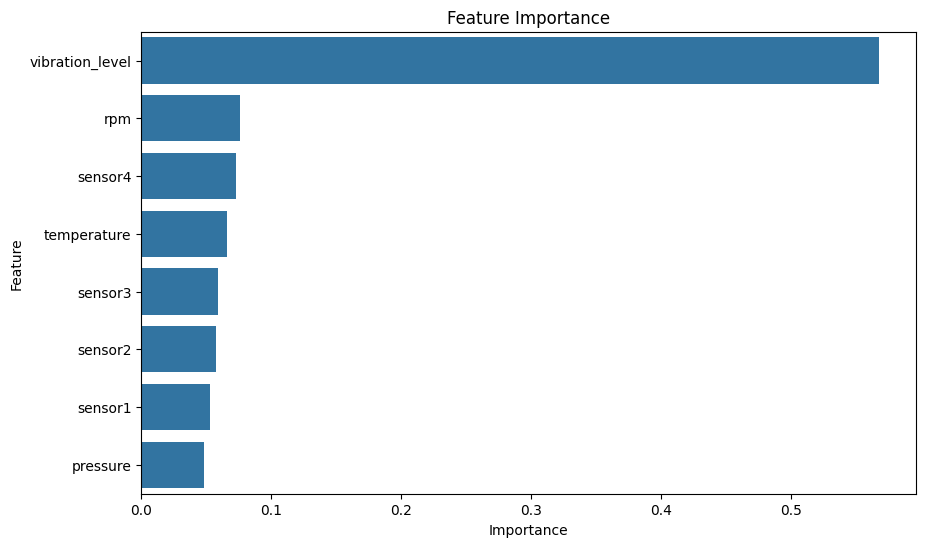

In [143]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [144]:
# # Save the model
# import joblib
# joblib.dump(model, 'predictive_maintenance_model.pkl')

# # Load the model
# loaded_model = joblib.load('predictive_maintenance_model.pkl')
# new_predictions = loaded_model.predict(X_test)


In [145]:
# Function to compute FFT features
def compute_fft_features(signal):
    if len(signal) == 0 or np.all(np.isnan(signal)):
        return np.nan
    signal = np.asarray(signal)
    fft_values = fft(signal)
    fft_magnitude = np.abs(fft_values)
    return np.mean(fft_magnitude[:len(fft_magnitude) // 2])

In [146]:
# Apply rolling window and compute FFT
window_size = 5  # Example: 5-hour rolling window
data['fft_sensor1'] = data['sensor1'].rolling(window=window_size).apply(compute_fft_features, raw=False)
data['fft_sensor2'] = data['sensor2'].rolling(window=window_size).apply(compute_fft_features, raw=False)
data['fft_sensor3'] = data['sensor3'].rolling(window=window_size).apply(compute_fft_features, raw=False)
data['fft_sensor4'] = data['sensor4'].rolling(window=window_size).apply(compute_fft_features, raw=False)

# Drop NaN rows caused by rolling window
data.dropna(inplace=True)


In [147]:
# Prepare Features and Labels
features = data[['sensor1', 'sensor2', 'sensor3', 'sensor4', 'temperature', 'pressure', 'rpm', 'vibration_level',
                 'fft_sensor1', 'fft_sensor2', 'fft_sensor3', 'fft_sensor4']]
labels = data['failure']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [148]:
model_g = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model_g.fit(X_train, y_train)
# Evaluate Model Performance
y_pred_g = model_g.predict(X_test)

In [149]:
print("Classification Report:")
print(classification_report(y_test, y_pred_g))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        95
           1       0.70      0.76      0.73       105

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



In [150]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_g))

Accuracy Score:
0.7


In [151]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [152]:
# Evaluate Model Performance
y_pred = model.predict(X_test)

In [153]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        95
           1       0.71      0.82      0.76       105

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [154]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.73


In [155]:
# Estimate Remaining Useful Life (RUL)
# Using regression on failure probability to estimate RUL
probabilities = model.predict_proba(features)[:, 1]
data['failure_probability'] = probabilities

def estimate_rul(probability):
    return max(0, int((1 - probability) * 100))  # RUL decreases as failure probability increases

data['RUL'] = data['failure_probability'].apply(estimate_rul)

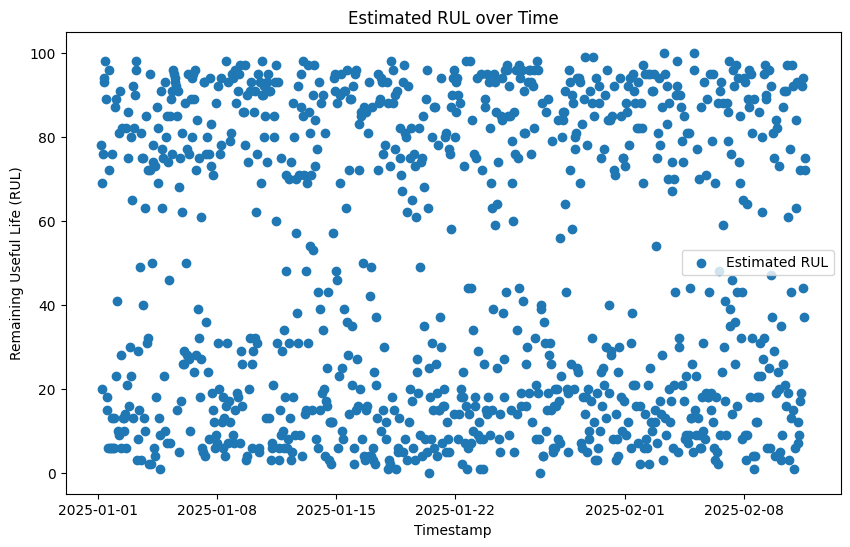

In [159]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['timestamp'], data['RUL'], label='Estimated RUL')
plt.xlabel('Timestamp')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Estimated RUL over Time')
plt.legend()
plt.show()

In [158]:
# Save Results
data[['timestamp', 'failure_probability', 'RUL']].to_csv('rul_predictions.csv', index=False)
